In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data'

In [4]:
file=f'{bigDir}\cellinfo_200203_v7.csv'

In [5]:
data=pd.read_csv(file)

# data visualizations 

In [6]:
data=data.drop(columns=['Unnamed: 0'])

In [7]:
data.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,mol_age_mod,nuc_hp1b_total,inner_hp1b_total,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu
0,20200203_cell_00.ciz,20200203-06-13-63X 16bit,20200203 simcmxy06,647.518,153.039,MCM3,1.0,HP1beta,2.0,3.0,...,0.225,9.427838e+08,349642876.0,593140967.0,288852199.0,183644112.0,105208087.0,653931644.0,165998764.0,487932880.0
1,20200203_cell_01.ciz,20200203-06-25-63X 16bit,20200203 simcmxy06,1490.165,332.591,MCM3,1.0,HP1beta,2.0,3.0,...,0.166,6.651304e+08,192031110.0,473099293.0,177836101.0,77034723.0,100801378.0,487294302.0,114996387.0,372297915.0
2,20200203_cell_02.ciz,20200203-06-27-63X 16bit,20200203 simcmxy06,1560.535,380.034,MCM3,1.0,HP1beta,2.0,3.0,...,0.166,6.169736e+08,178148056.0,438825571.0,159898073.0,73030202.0,86867871.0,457075554.0,105117854.0,351957700.0
3,20200203_cell_03.ciz,20200203-06-29-63X 16bit,20200203 simcmxy06,930.763,391.252,MCM3,1.0,HP1beta,2.0,3.0,...,0.684,1.153006e+09,394670302.0,758335461.0,371018158.0,228382017.0,142636141.0,781987605.0,166288285.0,615699320.0
4,20200203_cell_04.ciz,20200203-06-51-63X 16bit,20200203 simcmxy06,1653.035,635.701,MCM3,1.0,HP1beta,2.0,3.0,...,0.376,9.681591e+08,337894665.0,630264462.0,298677919.0,193267329.0,105410590.0,669481208.0,144627336.0,524853872.0


In [8]:
data.loc[(data.category=='middel G1'),'category']='middleG1'
data.loc[(data.category=='earlr G1'),'category']='earlyG1'

In [9]:
Luc=data.loc[(data.group=='siLuc'),:].copy()

In [10]:
MCM3=data.loc[(data.group=='siMCM3'),:].copy()

# group comparision

## MCM density per DAPI in het/nuc pixels

<IPython.core.display.Javascript object>


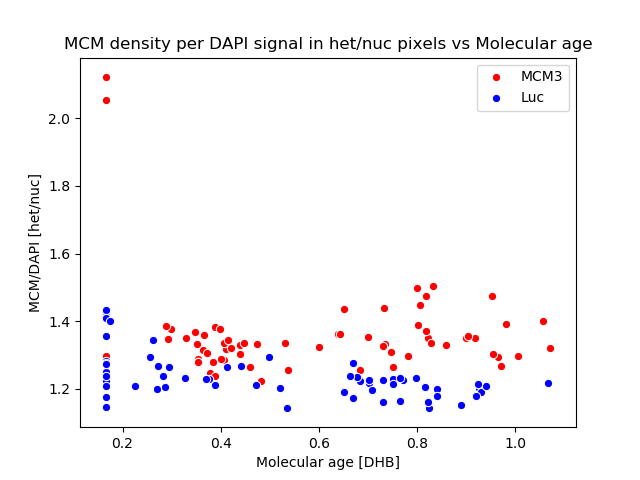

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [11]:
%matplotlib notebook
MCM3['temp']=(MCM3.nuc_mcm_het/MCM3.nuc_DAPI_het)/(MCM3.nuc_mcm_total/MCM3.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=MCM3.loc[(['G1' in x for x in MCM3.category]), :], color='red', label='MCM3')

Luc['temp']=(Luc.nuc_mcm_het/Luc.nuc_DAPI_het)/(Luc.nuc_mcm_total/Luc.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=Luc.loc[(['G1' in x for x in Luc.category]), :], color='blue', label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age')

It seems like there is an outlier from the modified molecular age cells. I will identify those cells and see what we can do with these outlier.

In [12]:
MCM3.loc[((MCM3.temp>2.0)&['G1' in x for x in MCM3.category]),'file']

128    20200203_cell_128.ciz
130    20200203_cell_130.ciz
Name: file, dtype: object

### plot without the outliers

<IPython.core.display.Javascript object>


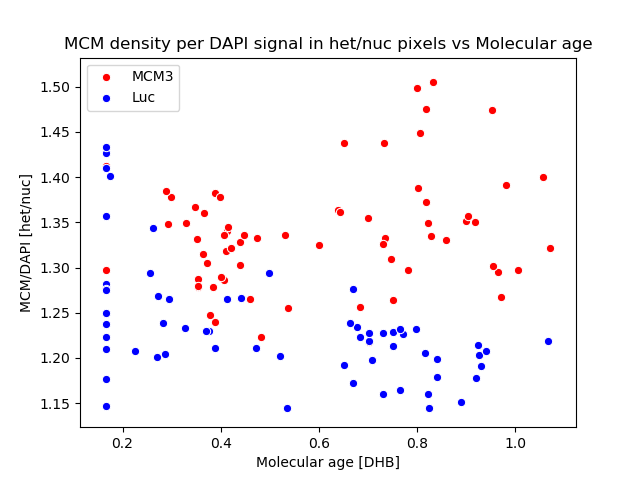

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [13]:
%matplotlib notebook
MCM3['temp']=(MCM3.nuc_mcm_het/MCM3.nuc_DAPI_het)/(MCM3.nuc_mcm_total/MCM3.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=MCM3.loc[((MCM3.temp<2.0)&['G1' in x for x in MCM3.category]), :], color='red', label='MCM3')

Luc['temp']=(Luc.nuc_mcm_het/Luc.nuc_DAPI_het)/(Luc.nuc_mcm_total/Luc.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=Luc.loc[(['G1' in x for x in Luc.category]), :], color='blue', label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age')

<IPython.core.display.Javascript object>


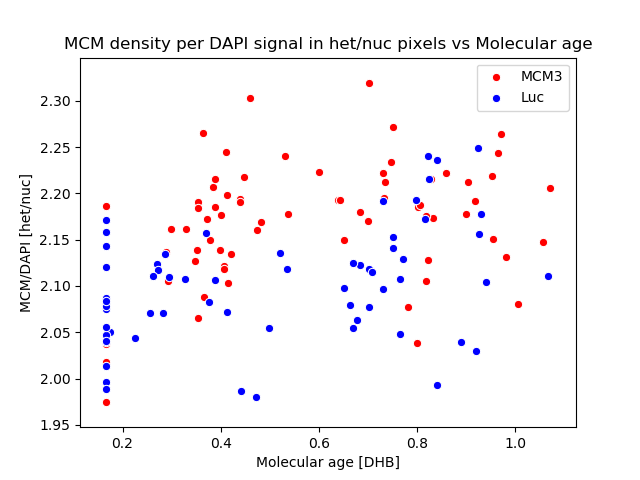

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [21]:
%matplotlib notebook
MCM3['temp']=(MCM3.nuc_mcm_het/MCM3.nuc_vol_het)/(MCM3.nuc_mcm_total/MCM3.nuc_vol_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=MCM3.loc[(['G1' in x for x in MCM3.category]), :], color='red', label='MCM3')

Luc['temp']=(Luc.nuc_mcm_het/Luc.nuc_vol_het)/(Luc.nuc_mcm_total/Luc.nuc_vol_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=Luc.loc[(['G1' in x for x in Luc.category]), :], color='blue', label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age')

<IPython.core.display.Javascript object>


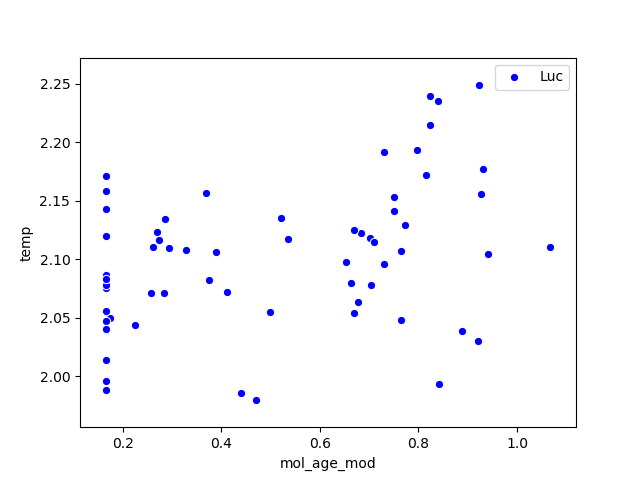

In [15]:
%matplotlib notebook


<IPython.core.display.Javascript object>


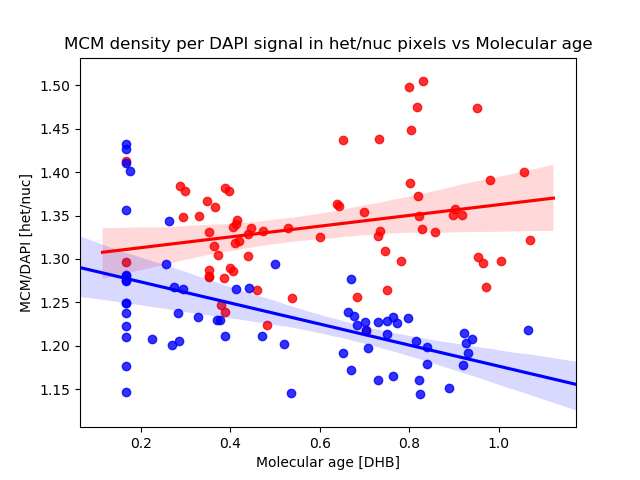

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [33]:
%matplotlib notebook
MCM3['temp']=(MCM3.nuc_mcm_het/MCM3.nuc_DAPI_het)/(MCM3.nuc_mcm_total/MCM3.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=MCM3.loc[((MCM3.temp<2.0)&['G1' in x for x in MCM3.category]), :], color='red', label='MCM3')

Luc['temp']=(Luc.nuc_mcm_het/Luc.nuc_DAPI_het)/(Luc.nuc_mcm_total/Luc.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=Luc.loc[(['G1' in x for x in Luc.category]), :], color='blue', label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age')

There is a lot of variance, espeically among the cells where the molecular age modification happened. However, the two groups show a contrasting pattern in the MCM density per DAPI in het/nuc pixels.

## MCM in heterochromatin pixels / DAPI in nucleus pixel

<IPython.core.display.Javascript object>


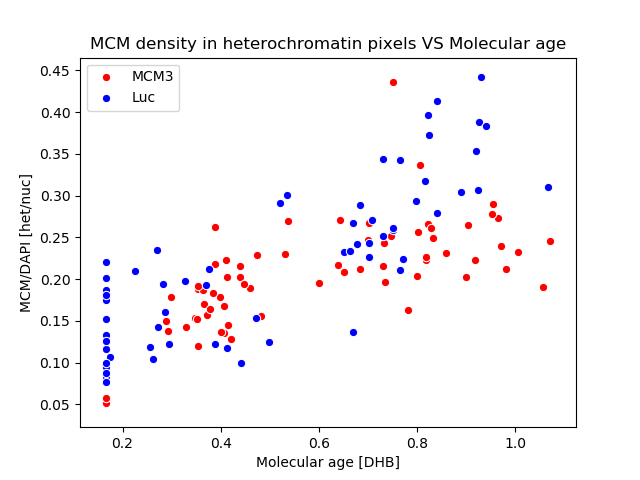

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [34]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_total
sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:], color='red', label='MCM3')

Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_DAPI_total
sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:], color='blue',label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## MCM/DAPI in heterochromatin pixels

<IPython.core.display.Javascript object>


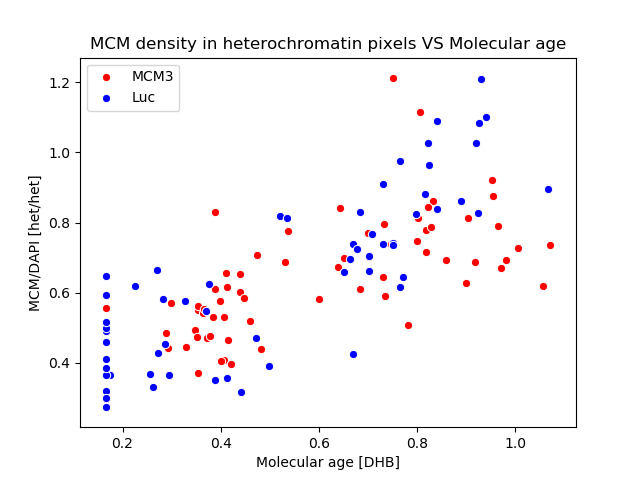

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [48]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_het
Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],color='red',label='MCM3')
sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],color='blue',label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## MCM/DAPI in nucleus pixels

<IPython.core.display.Javascript object>


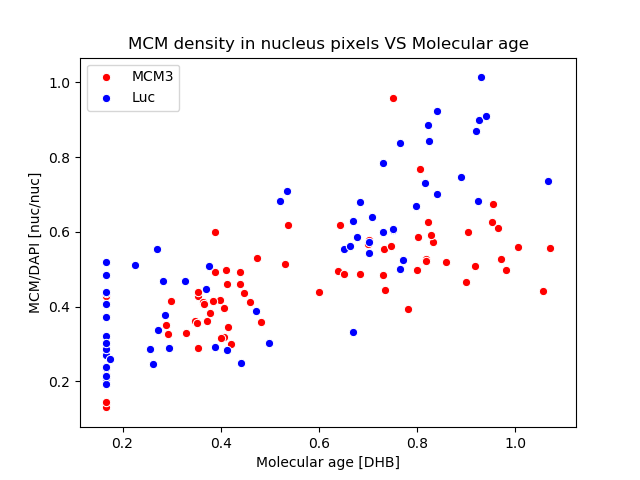

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [49]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_total/MCM3.nuc_DAPI_total
Luc['temp']=Luc.nuc_mcm_total/Luc.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],color='red',label='MCM3')
sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],color='blue',label='Luc')


plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## MCM density in heterochromatin / nucleus pixles

<IPython.core.display.Javascript object>


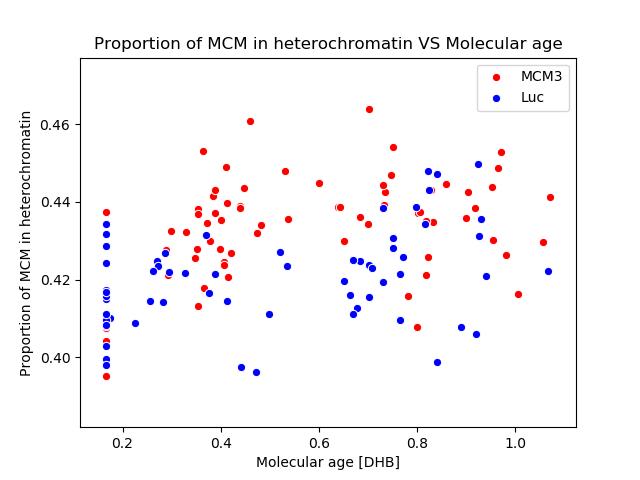

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [50]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_mcm_total
Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],color='red',label='MCM3')
sn.scatterplot(x='mol_age_mod',y='temp',data=Luc.loc[(['G1' in x for x in Luc.category]),:],color='blue',label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## MCM in nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


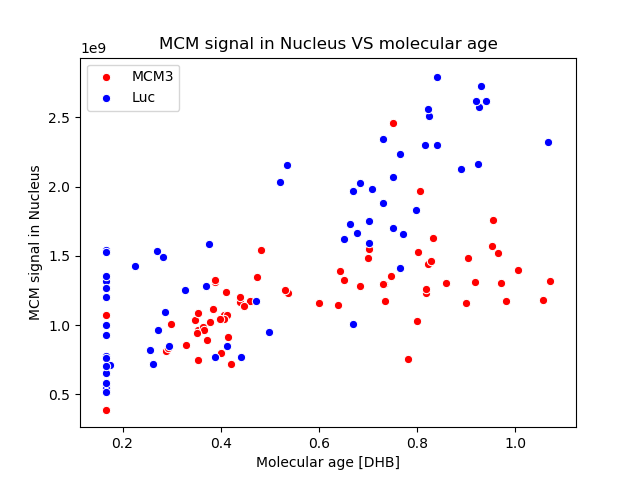

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [51]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],color='red',label='MCM3')
sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=Luc.loc[(['G1' in x for x in Luc.category]),:],color='blue',label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

<IPython.core.display.Javascript object>


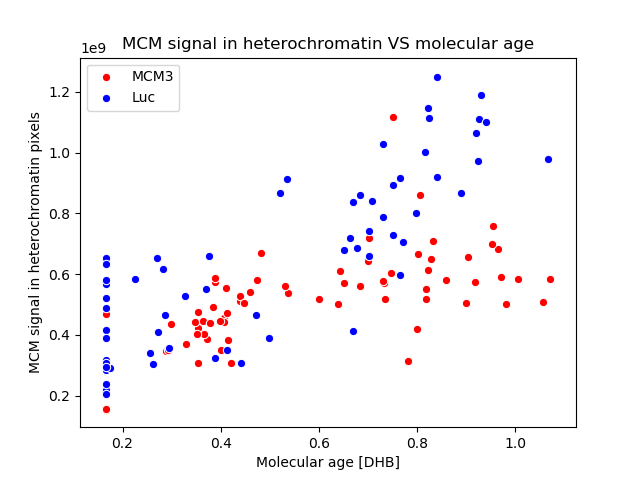

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [52]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],color='red',label='MCM3')
sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=Luc.loc[(['G1' in x for x in Luc.category]),:],color='blue',label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')